In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
import neurokit2 as nk
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'record_name': '101', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['75 F 1011 654 x1', 'Diapres'], 'sig_name': ['MLII', 'V1'], 'p_signal': array([[-0.345, -0.16 ],
       [-0.345, -0.16 ],
       [-0.345, -0.16 ],
       ...,
       [-0.295, -0.11 ],
       [-0.29 , -0.11 ],
       [ 0.   ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['101.dat', '101.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [955, 992], 'checksum': [29832, 19589], 'block_size': [0, 0]}
650000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10

KeyError: ignored

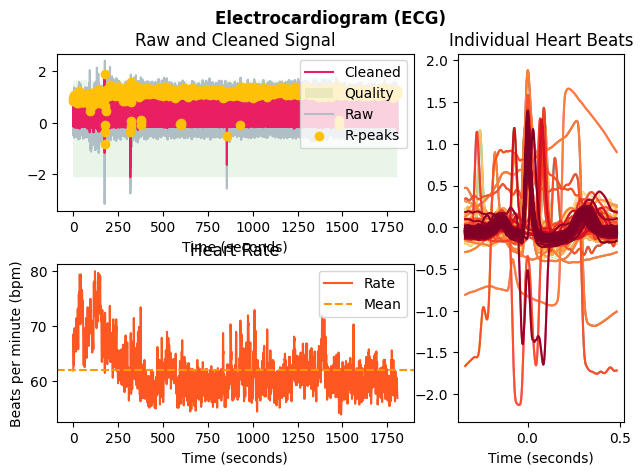

In [ ]:
#Datos con arrythmia
data = {
    
}

baseline_data = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/107"

fs = 360
time = 10  #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
sample_from = time * fs
sample_to = 20*fs # 5s de sampleo

full_record = record = wfdb.rdrecord(baseline_data)
full_record_data = full_record.__dict__
print(full_record_data)
n_samples = full_record_data['sig_len']
print(n_samples)
try:
  record = wfdb.rdrecord(baseline_data, sampfrom=sample_from, sampto=sample_to)
except:
  ecg, info = nk.ecg_process(full_record.to_dataframe()['V2'], sampling_rate = fs)

nk.ecg_plot(ecg, sampling_rate=fs)


x= True
while x == True:
  try:
    sample_from = time * fs
    sample_to = (time+10)*fs # 10s de sampleo
    data[f"{sample_from}-{sample_to}"] = {}
    data[f"{sample_from}-{sample_to}"][f"raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(f"{sample_from}-{sample_to}") 
  try:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["MLII"], sampling_rate=fs) 
  except:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["V2"], sampling_rate=fs) 
  time+=10
  if (time+10)*fs > n_samples*fs:
    print("hey!")
    x = False

data

<Axes: >

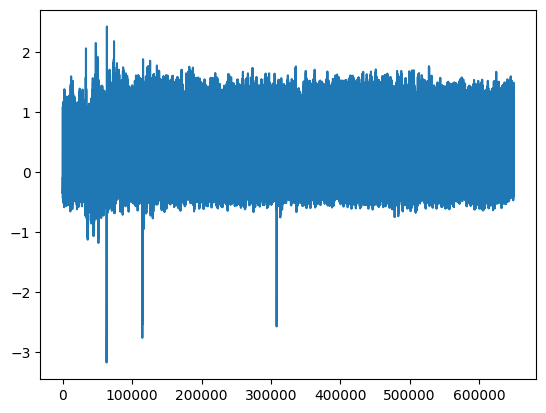

In [ ]:
ecg["ECG_Raw"].plot()

{'record_name': 's0303lre', 'n_sig': 15, 'fs': 1000, 'counter_freq': None, 'base_counter': None, 'sig_len': 10000, 'base_time': None, 'base_date': None, 'comments': ['age: 32', 'sex: female', 'ECG date: 24/06/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at rest): n/a', 'Stroke volume index (at rest): n/a', 'Pulmonary artery pressure (laod) (syst/diast): 

{'10000-20000': {'raw_data': <wfdb.io.record.Record at 0x7f1cf45b7460>,
  'ecg_signals':       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
  0     -0.1310  -0.018133  77.012835     0.938701            0            0   
  1     -0.1305  -0.019335  77.012835     0.938701            0            0   
  2     -0.1325  -0.020553  77.012835     0.938701            0            0   
  3     -0.1395  -0.021775  77.012835     0.938701            0            0   
  4     -0.1390  -0.022979  77.012835     0.938701            0            0   
  ...       ...        ...        ...          ...          ...          ...   
  9995  -0.1740  -0.008261  73.260073     0.000000            0            0   
  9996  -0.1675  -0.007769  73.260073     0.000000            0            0   
  9997  -0.1645  -0.007274  73.260073     0.000000            0            0   
  9998  -0.1620  -0.006805  73.260073     0.000000            0            0   
  9999  -0.1665  -0.006367  73.26

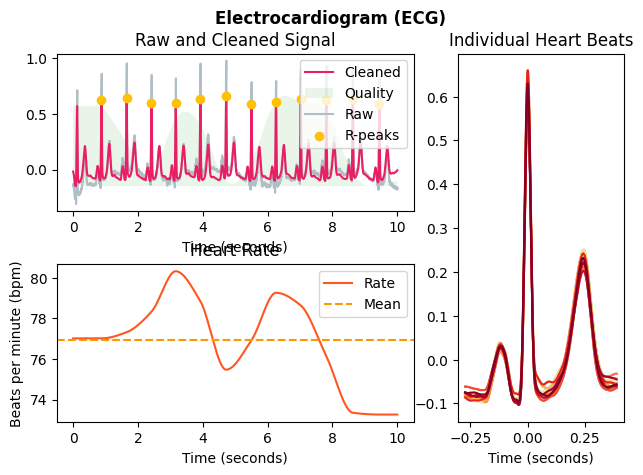

In [ ]:
#Para cargar datos sin arrythmia
data = {
    
}

baseline_data = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/PTB/patient105/s0303lre"

fs = 1000
time = 10  #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
sample_from = time * fs
sample_to = 20*fs # 5s de sampleo

full_record = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
full_record_data = full_record.__dict__
print(full_record_data)
n_samples = full_record_data['sig_len']
print(n_samples)
ecg, info = nk.ecg_process(full_record.to_dataframe()['ii'], sampling_rate = fs)
nk.ecg_plot(ecg, sampling_rate=fs)


x= True
while x == True:
  try:
    sample_from = time * fs
    sample_to = (time+10)*fs # 10s de sampleo
    data[f"{sample_from}-{sample_to}"] = {}
    data[f"{sample_from}-{sample_to}"][f"raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(f"{sample_from}-{sample_to}") 
  try:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["ii"], sampling_rate=fs) 
  except:
    pass
  time+=10
  if (time+10)*fs > n_samples*fs:
    print("hey!")
    x = False

data


In [ ]:
print(data)
for item in data:
  for feature in data[item]['ecg_signals']:
    data[item][feature] = data[item]['ecg_signals'][feature]

{'10000-20000': {'raw_data': <wfdb.io.record.Record object at 0x7f1cf45b7460>, 'ecg_signals':       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     -0.1310  -0.018133  77.012835     0.938701            0            0   
1     -0.1305  -0.019335  77.012835     0.938701            0            0   
2     -0.1325  -0.020553  77.012835     0.938701            0            0   
3     -0.1395  -0.021775  77.012835     0.938701            0            0   
4     -0.1390  -0.022979  77.012835     0.938701            0            0   
...       ...        ...        ...          ...          ...          ...   
9995  -0.1740  -0.008261  73.260073     0.000000            0            0   
9996  -0.1675  -0.007769  73.260073     0.000000            0            0   
9997  -0.1645  -0.007274  73.260073     0.000000            0            0   
9998  -0.1620  -0.006805  73.260073     0.000000            0            0   
9999  -0.1665  -0.006367  73.260073     0.000000

In [ ]:
data_df = pd.DataFrame.from_dict(data, orient= 'index')
data_df

,raw_data,ecg_signals,info,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,...,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
10000-20000,<wfdb.io.record.Record object at 0x7f1cf45b7460>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [875, 1651, 2417, 3164, 3925, ...",0 -0.1310 1 -0.1305 2 -0.1325 3...,0 -0.018133 1 -0.019335 2 -0.02...,0 77.012835 1 77.012835 2 77...,0 0.938701 1 0.938701 2 0.93...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
20000-30000,<wfdb.io.record.Record object at 0x7f1cf7ae7c70>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [981, 1764, 2570, 3342, 4097, ...",0 -0.1720 1 -0.1765 2 -0.1785 3...,0 -0.030871 1 -0.031122 2 -0.03...,0 75.958108 1 75.958108 2 75...,0 0.980621 1 0.980621 2 0.98...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
30000-40000,<wfdb.io.record.Record object at 0x7f1cf7ae6b30>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [510, 1323, 2119, 2914, 3734, ...",0 -0.1445 1 -0.1465 2 -0.1500 3...,0 -0.000118 1 -0.001388 2 -0.00...,0 76.063155 1 76.063155 2 76...,0 0.915537 1 0.915537 2 0.91...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
40000-50000,<wfdb.io.record.Record object at 0x7f1cf7ae77c0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [837, 1674, 2506, 3299, 4075, ...",0 0.7300 1 0.7475 2 0.7890 3...,0 -0.007939 1 -0.050668 2 -0.09...,0 74.140643 1 74.140643 2 74...,0 0.0 1 0.0 2 0.0 3 0....,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
50000-60000,<wfdb.io.record.Record object at 0x7f1cf7ae5d50>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [545, 1368, 2198, 3035, 3864, ...",0 0.0565 1 0.0545 2 0.0455 3...,0 0.062885 1 0.058237 2 0.05...,0 74.240720 1 74.240720 2 74...,0 0.973624 1 0.973624 2 0.97...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
60000-70000,<wfdb.io.record.Record object at 0x7f1cf7ae7a30>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [1044, 1871, 2673, 3452, 4217,...",0 -0.1770 1 -0.1710 2 -0.1720 3...,0 -0.048974 1 -0.048693 2 -0.04...,0 77.876106 1 77.876106 2 77...,0 0.46105 1 0.46105 2 0.4610...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 0 1 0 2 0 3 0 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.0 1 0.0 2 0.0 3 0....
70000-80000,<wfdb.io.record.Record object at 0x7f1cf7ae6bc0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [1043,

In [ ]:
ecg_signal_data = ['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks']

def dataAdquisition(data,fs):
  for item in data:
    peaks, info = nk.ecg_peaks(data[item]["ecg_signals"]["ECG_Clean"], sampling_rate=fs)
    # data[item]["r_peaks"] = data[item][e]
    data[item]["hrv_time"] = nk.hrv_time(peaks, sampling_rate=fs, show=False)
    for var in data[item]["hrv_time"]:
      data[item][var] = data[item]["hrv_time"][var].to_frame().iloc[0][var]
    for feature in ecg_signal_data:
      data[item][feature] = data[item]["ecg_signals"][feature].sum()
    data[item]["mean_quality"]  = data[item]["ecg_signals"]["ECG_Quality"].mean()


  return data

In [ ]:
control_data_clean = dataAdquisition(data, fs)

In [ ]:
#sin arrythmia
# for item in control_data_clean:
#   dict_data = control_data_clean[item]["raw_data"].__dict__
#   control_data_clean[item]["sex"] = dict_data['comments'][1].replace('sex: ', '')
#   control_data_clean[item]["age"] = dict_data['comments'][0].replace('age: ', '')

In [ ]:
# #sin arrythmia
# control_data_df = pd.DataFrame.from_dict(control_data_clean, orient = 'index')
# control_data_df = control_data_df.join(pd.get_dummies(control_data_df["sex"])).drop("sex", axis = 1)

In [ ]:
#arrythmia
for item in control_data_clean:
  dict_data = control_data_clean[item]["raw_data"].__dict__
  control_data_clean[item]["sex"] = dict_data['comments'][0].split(' ')[1]
  control_data_clean[item]["age"] = dict_data['comments'][0].split(' ')[0]

control_data_df = pd.DataFrame.from_dict(control_data_clean, orient = 'index')
control_data_df = control_data_df.join(pd.get_dummies(control_data_df["sex"])).drop("sex", axis = 1)

In [ ]:
control_data_df = control_data_df[control_data_df["mean_quality"]>0.5]

In [ ]:
control_data_df.drop(columns = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2','HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5'], inplace = True)


In [ ]:
control_data_clean

{'10000-20000': {'raw_data': <wfdb.io.record.Record at 0x7f1cf45b7460>,
  'ecg_signals':       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
  0     -0.1310  -0.018133  77.012835     0.938701            0            0   
  1     -0.1305  -0.019335  77.012835     0.938701            0            0   
  2     -0.1325  -0.020553  77.012835     0.938701            0            0   
  3     -0.1395  -0.021775  77.012835     0.938701            0            0   
  4     -0.1390  -0.022979  77.012835     0.938701            0            0   
  ...       ...        ...        ...          ...          ...          ...   
  9995  -0.1740  -0.008261  73.260073     0.000000            0            0   
  9996  -0.1675  -0.007769  73.260073     0.000000            0            0   
  9997  -0.1645  -0.007274  73.260073     0.000000            0            0   
  9998  -0.1620  -0.006805  73.260073     0.000000            0            0   
  9999  -0.1665  -0.006367  73.26

# momento de predicciones

In [ ]:
control_data_df.columns

Index(['raw_data', 'ecg_signals', 'info', 'ECG_Raw', 'ECG_Clean', 'ECG_Rate',
       'ECG_Quality', 'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets',
       'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets',
       'ECG_Phase_Atrial', 'ECG_Phase_Completion_Atrial',
       'ECG_Phase_Ventricular', 'ECG_Phase_Completion_Ventricular', 'hrv_time',
       'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'mean_quality', 'age', '32'],
      dtype='object')

In [ ]:
drop_list=['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks', 'age',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks']
for item in control_data_df.columns:
    if item not in drop_list:
      control_data_df.drop(columns = [item], inplace = True)

control_data_df

,ECG_R_Peaks,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,...,HRV_IQRNN,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,age
10000-20000,12,12,11,11,12,779.090909,23.926782,20.319941,20.934023,0.030711,...,29.50,761.0,795.0,0.0,36.363636,747.0,819.0,5.500000,15.6250,age:
20000-30000,12,12,11,11,12,789.909091,30.988561,29.306996,29.688943,0.039231,...,33.00,769.0,806.0,0.0,63.636364,755.0,864.0,5.500000,15.6250,age:
30000-40000,12,12,11,11,12,788.818182,27.571065,17.181385,17.389652,0.034952,...,44.00,765.0,814.0,0.0,36.363636,742.0,820.0,2.750000,0.0000,age:
40000-50000,12,12,11,11,12,809.272727,27.404711,22.792543,23.772299,0.033863,...,48.00,780.0,837.0,0.0,36.363636,771.0,847.0,5.500000,0.0000,age:
60000-70000,12,12,11,11,12,770.454545,25.613917,16.540859,16.077590,0.033245,...,19.00,758.0,779.0,0.0,27.272727,737.0,827.0,2.750000,23.4375,age:
70000-80000,12,12,11,11,12,742.272727,17.286358,15.902830,15.947483,0.023288,...,17.50,732.0,756.0,0.0,27.272727,724.0,781.0,3.666667,0.0000,age:
80000-90000,13,13,12,12,13,737.583333,16.516979,17.560286,18.408496,0.022393,...,21.50,723.0,747.8,0.0,25.000000,715.0,769.0,4.000000,31.2500,age:
90000-100000,12,12,11,11,12,749.363636,28.517618,23.918612,25.074334,0.038056,...,26.00,733.0,760.0,0.0,54.545455,708.0,797.0,5.500000,31.2500,age:
100000-110000,13,13,12,12,13,743.333333,12.227639,16.558436,17.315259,0.016450,...,16.25,730.8,749.8,0.0,25.000000,726.0,765.0,3.000000,23.4375,age:


\

In [ ]:
data_ml = control_data_df
data_ml["ratio p/r peaks"] = data_ml["ECG_P_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio q/r peaks"] = data_ml["ECG_Q_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio s/r peaks"] = data_ml["ECG_S_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio t/r peaks"] = data_ml["ECG_T_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml


,ECG_R_Peaks,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,...,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,age,ratio p/r peaks,ratio q/r peaks,ratio s/r peaks,ratio t/r peaks
10000-20000,12,12,11,11,12,779.090909,23.926782,20.319941,20.934023,0.030711,...,36.363636,747.0,819.0,5.500000,15.6250,age:,1.0,0.916667,0.916667,1.0
20000-30000,12,12,11,11,12,789.909091,30.988561,29.306996,29.688943,0.039231,...,63.636364,755.0,864.0,5.500000,15.6250,age:,1.0,0.916667,0.916667,1.0
30000-40000,12,12,11,11,12,788.818182,27.571065,17.181385,17.389652,0.034952,...,36.363636,742.0,820.0,2.750000,0.0000,age:,1.0,0.916667,0.916667,1.0
40000-50000,12,12,11,11,12,809.272727,27.404711,22.792543,23.772299,0.033863,...,36.363636,771.0,847.0,5.500000,0.0000,age:,1.0,0.916667,0.916667,1.0
60000-70000,12,12,11,11,12,770.454545,25.613917,16.540859,16.077590,0.033245,...,27.272727,737.0,827.0,2.750000,23.4375,age:,1.0,0.916667,0.916667,1.0
70000-80000,12,12,11,11,12,742.272727,17.286358,15.902830,15.947483,0.023288,...,27.272727,724.0,781.0,3.666667,0.0000,age:,1.0,0.916667,0.916667,1.0
80000-90000,13,13,12,12,13,737.583333,16.516979,17.560286,18.408496,0.022393,...,25.000000,715.0,769.0,4.000000,31.2500,age:,1.0,0.923077,0.923077,1.0
90000-100000,12,12,11,11,12,749.363636,28.517618,23.918612,25.074334,0.038056,...,54.545455,708.0,797.0,5.500000,31.2500,age:,1.0,0.916667,0.916667,1.0
100000-110000,13,13,12,12,13,743.333333,12.227639,16.558436,17.315259,0.016450,...,25.000000,726.0,765.0,3.000000,23.4375,age:,1.0,0.923077,0.923077,1.0


In [ ]:
data_ml.columns

Index(['ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks',
       'ECG_T_Peaks', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD',
       'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN',
       'HRV_IQRNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'age',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks'],
      dtype='object')

In [ ]:
all_columns = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'age', 'ECG_R_Peaks',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks']
for item in data_ml:
  if item in all_columns:
    print(item)
  else:
    data_ml.drop(columns = [item], inplace = True)
data_ml

ECG_R_Peaks
ECG_P_Peaks
ECG_Q_Peaks
ECG_S_Peaks
ECG_T_Peaks
HRV_MeanNN
HRV_SDNN
HRV_RMSSD
HRV_SDSD
HRV_CVNN
HRV_CVSD
HRV_MedianNN
HRV_MadNN
HRV_MCVNN
HRV_IQRNN
HRV_Prc20NN
HRV_Prc80NN
HRV_pNN50
HRV_pNN20
HRV_MinNN
HRV_MaxNN
HRV_HTI
HRV_TINN
age
ratio p/r peaks
ratio q/r peaks
ratio s/r peaks
ratio t/r peaks


,ECG_R_Peaks,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,...,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,age,ratio p/r peaks,ratio q/r peaks,ratio s/r peaks,ratio t/r peaks
10000-20000,12,12,11,11,12,779.090909,23.926782,20.319941,20.934023,0.030711,...,36.363636,747.0,819.0,5.500000,15.6250,age:,1.0,0.916667,0.916667,1.0
20000-30000,12,12,11,11,12,789.909091,30.988561,29.306996,29.688943,0.039231,...,63.636364,755.0,864.0,5.500000,15.6250,age:,1.0,0.916667,0.916667,1.0
30000-40000,12,12,11,11,12,788.818182,27.571065,17.181385,17.389652,0.034952,...,36.363636,742.0,820.0,2.750000,0.0000,age:,1.0,0.916667,0.916667,1.0
40000-50000,12,12,11,11,12,809.272727,27.404711,22.792543,23.772299,0.033863,...,36.363636,771.0,847.0,5.500000,0.0000,age:,1.0,0.916667,0.916667,1.0
60000-70000,12,12,11,11,12,770.454545,25.613917,16.540859,16.077590,0.033245,...,27.272727,737.0,827.0,2.750000,23.4375,age:,1.0,0.916667,0.916667,1.0
70000-80000,12,12,11,11,12,742.272727,17.286358,15.902830,15.947483,0.023288,...,27.272727,724.0,781.0,3.666667,0.0000,age:,1.0,0.916667,0.916667,1.0
80000-90000,13,13,12,12,13,737.583333,16.516979,17.560286,18.408496,0.022393,...,25.000000,715.0,769.0,4.000000,31.2500,age:,1.0,0.923077,0.923077,1.0
90000-100000,12,12,11,11,12,749.363636,28.517618,23.918612,25.074334,0.038056,...,54.545455,708.0,797.0,5.500000,31.2500,age:,1.0,0.916667,0.916667,1.0
100000-110000,13,13,12,12,13,743.333333,12.227639,16.558436,17.315259,0.016450,...,25.000000,726.0,765.0,3.000000,23.4375,age:,1.0,0.923077,0.923077,1.0


In [ ]:
final_df = pd.DataFrame()
for item in drop_list:
  final_df[item]=data_ml[item]


In [ ]:
final_df.drop(columns = "age", inplace = True)

In [ ]:
import joblib
filename = '/content/drive/Shareddrives/Proyecto Final/Progra/modelo_final_FINAL.joblib'

loaded_model = joblib.load(filename)
result = loaded_model.predict(final_df).tolist()
print(result)

ValueError: ignored

In [ ]:
len(result)

In [ ]:
final_df["arrythmia"]= result

In [ ]:
final_df.to_csv("final.csv")

El modelo se equivoco tres veces. :(

In [ ]:
abnormality_per = result.count(1)/result.count(0)
print(abnormality_per)